In [121]:
import numpy as np
import matplotlib.pyplot as plt

Resolver ODEs usando el Método de Euler. 
A continucación se van a reproducir los modelos de _When zombies attack!: Mathematical modelling of an outbreak of zombie infection_ de Munz usando los parámetros dados por Witkowski en _Zombie Apocalypse: An Epidemic Model_ ya que los dados por Munz no dan los modelos mostrados. 

In [122]:
#Parámetros dados por Munz
a = 0.005  #Zombies move to the removed class upon being ‘defeated’.
b = 0.0095 # Susceptibles can become zombies through transmission via an encounter with a zombie 
d =  0.0 # non-zombierelated death
z = 0.0001  # Humans in the removed class can resurrect and become a zombie
p = 0.005

In [123]:
#Parámetros dados por Witkowski
a = 0.005  #Zombies move to the removed class upon being ‘defeated’.
b = 0.0028 # Susceptibles can become zombies through transmission via an encounter with a zombie 
d =  0.0 # non-zombierelated death
z = 5  # Humans in the removed class can resurrect and become a zombie
p = 5

In [124]:
def euler(y, t, dt, derivadas):
    y_next = y + derivadas(y, t)*dt
    return y_next

# SIR Basic Model 

$$• Susceptible (S)$$
$$• Zombie (Z)$$
$$• Removed (R)$$

Only humans can become infected through contact with zombies, and zombies only have a craving for human flesh so we do not consider any other lifeforms in the model. 

New zombies can only come from two sources:

    • The resurrected from the newly deceased (removed group)
    
    • Susceptibles who have ‘lost’ an encounter with a zombie
$$ 
\dot{S} = Π − βSZ − δS
$$
$$
\dot{Z} = βSZ + ζR − αSZ
$$
$$
\dot{R} = δS + αSZ − ζR
$$


In [125]:
def bModel(estado, sistema):
    g0 = -b*estado[0]*estado[1] #assume birth rate = background deathrate
    g1 = b*estado[0]*estado[1] + z*estado[2]  - a*estado[0] * estado[1]
    g2 = d*estado[0] - z*estado[2] + a*estado[0] * estado[1]
    return np.array([g0, g1,g2])

## No zombies

Text(0.5, 1.0, 'Basic Model with no zombies')

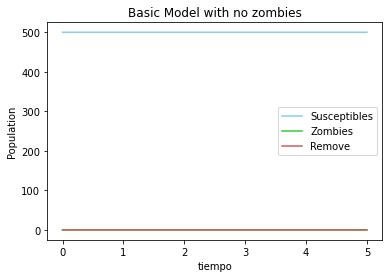

In [126]:
N = 10000 # número de pasos
s0 = 500  # susceptibles inicial
z0 = 0.0  # infectados
r0 = 0.0  # remove
tau = 5.0 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso
time = np.linspace(0, tau, N)
y = np.zeros([N,3])

y[0,0] = 500
y[0,1] = 0 #No zombies
y[0,2] = 0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, bModel)

susdata = [y[j,0] for j in range(N)]
zomdata = [y[j,1] for j in range(N)]
remdata = [y[j,2] for j in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.xlabel("tiempo")
plt.ylabel("Population")
plt.legend(loc="best")
plt.title("Basic Model with no zombies")

## Con zombies parámetros de Munz

Text(0.5, 1.0, 'Basic Model with zombies-Munz parameters')

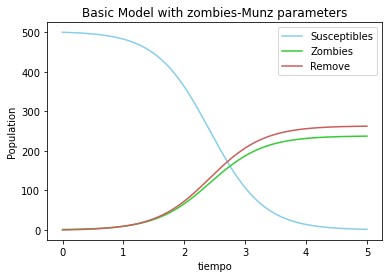

In [127]:
a = 0.005  #Zombies move to the removed class upon being ‘defeated’.
b = 0.0095 # Susceptibles can become zombies through transmission via an encounter with a zombie 
d =  0.0001 # non-zombierelated death
z = 0.0001  # Humans in the removed class can resurrect and become a zombie

N = 10000 # número de pasos
s0 = 500  # susceptibles inicial
z0 = 1.0  # infectados
r0 = 0.0  # remove
tau = 5.0 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso
time = np.linspace(0, tau, N)
y = np.zeros([N,3])

y[0,0] = 500
y[0,1] = 1 #Hay zombies
y[0,2] = 0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, bModel)
susdata = [y[j,0] for j in range(N)]
zomdata = [y[j,1] for j in range(N)]
remdata = [y[j,2] for j in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.xlabel("tiempo")
plt.ylabel("Population")
plt.legend(loc="best")
plt.title("Basic Model with zombies-Munz parameters")

## Con zombies parámetros de Witkowski

Text(0.5, 1.0, 'Basic Model with zombies-Witkowski fixed parameters')

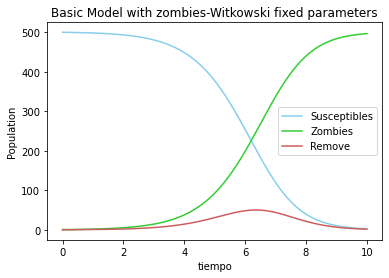

In [128]:
b = 0.0028 # Susceptibles can become zombies through transmission via an encounter with a zombie 
z = 5  # Humans in the removed class can resurrect and become a zombie
p = 5

N = 20000 # número de pasos
s0 = 500  # susceptibles inicial
z0 = 1.0  # infectados
r0 = 0.0  # remove
tau = 10.0 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso
time = np.linspace(0, tau, N)
y = np.zeros([N,3])

y[0,0] = 500
y[0,1] = 1 #Hay zombies
y[0,2] = 0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, bModel)
susdata = [y[j,0] for j in range(N)]
zomdata = [y[j,1] for j in range(N)]
remdata = [y[j,2] for j in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.xlabel("tiempo")
plt.ylabel("Population")
plt.legend(loc="best")
plt.title("Basic Model with zombies-Witkowski fixed parameters")

# The model with latent infection

•Susceptibles first move to an infected class once infected and remain there for some period of time.

• Infected individuals can still die a ‘natural’ death before becoming a zombie; otherwise, they become a zombie.

$$ 
\dot{S} = Π − βSZ − δS
$$
$$
\dot{I} = βSZ - ρI − δI
$$
$$
\dot{Z} = ρI + ζR − αSZ
$$
$$
\dot{R} = δS + δI + αSZ − ζR
$$

Short timescale and hence Π = δ = 0

In [129]:
def infModel(estado, sistema):
    g0 = -b*estado[0]*estado[2] #assume birth rate = background deathrate
    g1 =  b*estado[0]*estado[2] - p*estado[1]
    g2 =  p*estado[1]+ z*estado[3]  - a*estado[0] * estado[2]
    g3 = - z*estado[3] + a*estado[0] * estado[2]
    return np.array([g0, g1,g2,g3])

## Infección latente con zombies parámetros de Munz

Text(0.5, 1.0, 'Latent Infection-Munz parameters')

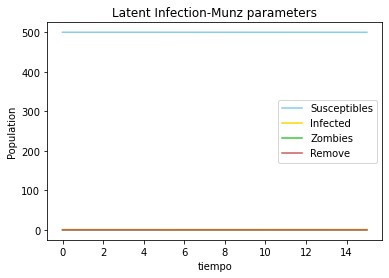

In [140]:
a = 0.005  #Zombies move to the removed class upon being ‘defeated’.
b = 0.0095 # Susceptibles can become zombies through transmission via an encounter with a zombie 
d =  0.0001 # non-zombierelated death
z = 0.0001  # Humans in the removed class can resurrect and become a zombie
p = .005 #p = 5 y se ve la gráfica bien 
N = 30000 # número de pasos
s0 = 500  # susceptibles inicial
z0 = 1.0  # infectados
r0 = 0.0  # remove
tau = 15.0 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso
time = np.linspace(0, tau, N)
y = np.zeros([N,4])

y[0,0] = 500
y[0,1] = 1 #Hay zombies
y[0,2] = 0
y[0,3] = 0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, infModel)
susdata = [y[j,0] for j in range(N)]
infdata = [y[j,1] for j in range(N)]
zomdata = [y[j,2] for j in range(N)]
remdata = [y[j,3] for j in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, infdata, label="Infected", color = 'gold')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.xlabel("tiempo")
plt.ylabel("Population")
plt.legend(loc="best")
plt.title("Latent Infection-Munz parameters")

## Infección latente con zombies parámetros de Witkowski

Text(0.5, 1.0, 'Latent Infection-Witkowski fixed parameters')

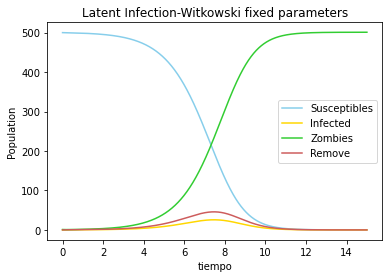

In [131]:
b =  0.0028 #once infected what for some period of time become a zombie
p = 5
z = 5

N = 30000
tau = 15.0 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso
time = np.linspace(0, tau, N)
y = np.zeros([N,4])
y[0,0] = 500
y[0,1] = 0
y[0,2] = 1
y[0,3] = 0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, infModel)

susdata = [y[j,0] for j in range(N)]
infdata = [y[j,1] for j in range(N)]
zomdata = [y[j,2] for j in range(N)]
remdata = [y[j,3] for j in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, infdata, label="Infected", color = 'gold')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.xlabel("tiempo")
plt.ylabel("Population")
plt.legend(loc="best")
plt.title("Latent Infection-Witkowski fixed parameters")

#  The model with quarantine

• The quarantined area only contains members of the infected or zombie populations (entering at rates κ and σ, rspectively).

• There is a chance some members will try to escape, but any that tried to would be killed before finding their ‘freedom’ (parameter γ).

• These killed individuals enter the removed class and may later become reanimated as ‘free’ zombies.

$$ 
\dot{S} = Π − βSZ − δS
$$
$$
\dot{I} = βSZ − ρI − δI − κI
$$
$$
\dot{Z} = ρI + ζR − αSZ − σZ
$$
$$
\dot{R} = δS + δI + αSZ − ζR + γQ
$$
$$
\dot{Q} = κI + σZ − γQ
$$


In [132]:
k = 0.003
sig = 0.001
gam = 0.001
def quaModel(estado, sistema):
    g0 = -b*estado[0]*estado[2] 
    g1 = b*estado[0]*estado[2] - p*estado[1] - k *estado[1]
    g2 = (p)*estado[1] + z*estado[3]  - a*estado[0] * estado[2] -sig*estado[2]
    g3 = - z*estado[3] + a*estado[0] * estado[2] + gam * estado[4]
    g4 = k * estado[1] + sig * estado[2]- gam*estado[4]
    
    return np.array([g0, g1,g2,g3,g4])

## Cuarentena con parámetros de Munz

Text(0.5, 1.0, 'Quarantine model-Munz parameters')

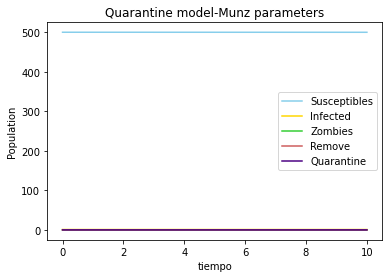

In [133]:
b = 0.0095 # Susceptibles can become zombies through transmission via an encounter with a zombie 
d =  0.0001 # non-zombierelated death
z = 0.0001 
p = 0.005
N = 20000
tau = 10.0 # tiempo de la simulación
time = np.linspace(0, tau, N)
y = np.zeros([N,5])
y[0,0] = 500
y[0,1] = 1
y[0,2] = 0
y[0,3] = 0
y[0,4] = 0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, quaModel)

susdata = [y[j,0] for j in range(N)]
infdata = [y[j,1] for j in range(N)]
zomdata = [y[j,2] for j in range(N)]
remdata = [y[j,3] for j in range(N)]
quadata = [y[j,4] for i in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, infdata, label="Infected", color = 'gold')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.plot(time, quadata, label="Quarantine", color = 'indigo')
plt.xlabel("tiempo")
plt.ylabel("Population")
plt.legend(loc="best")
plt.title("Quarantine model-Munz parameters")

## Cuarentena con parámetros de Witkowski

Text(0.5, 1.0, 'Quarantine model-Witkowski fixed parameters')

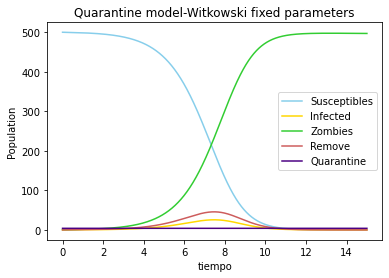

In [134]:
b =  0.0028 #once infected what for some period of time become a zombie
p = 5
z = 5

N = 30000
tau = 15.0 # tiempo de la simulación
time = np.linspace(0, tau, N)
y = np.zeros([N,5])
y[0,0] = 500
y[0,1] = 0
y[0,2] = 1
y[0,3] = 0
y[0,4] = 0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, quaModel)

susdata = [y[j,0] for j in range(N)]
infdata = [y[j,1] for j in range(N)]
zomdata = [y[j,2] for j in range(N)]
remdata = [y[j,3] for j in range(N)]
quadata = [y[j,4] for i in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, infdata, label="Infected", color = 'gold')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.plot(time, quadata, label="Quarantine", color = 'indigo')
plt.xlabel("tiempo")
plt.ylabel("Population")
plt.legend(loc="best")
plt.title("Quarantine model-Witkowski fixed parameters")

# A model with treatment

Things that need to be considered now include:

• Since we have treatment, we no longer need the quarantine.

• The cure will allow zombies to return to their original human form regardless of how they became zombies in the first place.

• Any cured zombies become susceptible again; the cure does not provide immunity.


$$ 
\dot{S} =  Π − βSZ − δS + cZ
$$
$$
\dot{I} = βSZ − ρI − δI
$$
$$
\dot{Z} = ρI + ζR − αSZ − cZ
$$
$$
\dot{R} = δS + δI + αSZ − ζR
$$

In [52]:
c = 0.3 #cure

def treatModel(estado, sistema):
    g0 = -b*estado[0]*estado[2]  + c * estado[2]
    g1 = b*estado[0]*estado[2] - p*estado[1]
    g2 = (p)*estado[1] + z*estado[3]  - a*estado[0] * estado[2] - c * estado[2]
    g3 = - z*estado[3] + a*estado[0] * estado[2]
    
    return np.array([g0, g1,g2,g3])

Text(0.5, 1.0, 'Treatment model-Witkowski fixed parameters')

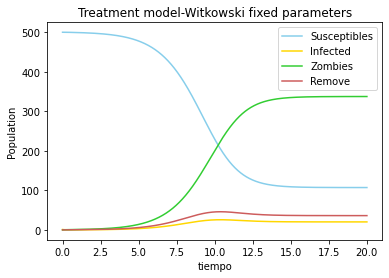

In [53]:
N = 40000
tau = 20.0 # tiempo de la simulación
time = np.linspace(0, tau, N)
y = np.zeros([N,4])
y[0,0] = s0
y[0,1] = 1
y[0,2] = 0
y[0,3] = r0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, treatModel)

susdata = [y[j,0] for j in range(N)]
infdata = [y[j,1] for j in range(N)]
zomdata = [y[j,2] for j in range(N)]
remdata = [y[j,3] for j in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, infdata, label="Infected", color = 'gold')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.xlabel("tiempo")
plt.ylabel("Population")
plt.legend(loc="best")
plt.title("Treatment model-Witkowski fixed parameters")

# Impulsive Eradication

We attempted to control the zombie population by strategically destroying them at such times that our resources permit.


$$ 
\dot{S} =  Π − βSZ − δS 
$$
$$
\dot{Z} = βSZ + ζR − αSZ
$$
$$
\dot{R} = δS + αSZ − ζR
$$
$$
∆Z = −knZ
$$


In [54]:
k = 0.25
a = 0.0075
b = 0.0055
z = 0.09
d = 0.0001


In [55]:
def impEraModel(estado, sistema):
    g0 = -b*estado[0]*estado[1] #assume birth rate = background deathrate
    g1 = b*estado[0]*estado[1] + z*estado[2]  - a*estado[0] * estado[1]
    g2 = d*estado[0] - z*estado[2] + a*estado[0] * estado[1]
    return np.array([g0, g1,g2])

# Diferencias entre epidemia normal y epidemia zombie

Una epidemia es el **aumento extraordinario del número de casos de una enfermedad infecciosa** que ya existe en una región o población determinada. Puede referirse también a la aparición de un número importante de casos de una enfermedad infecciosa en una región o población habitualmente libre de la enfermedad.

Un **zombie moderno** es un cadáver reanimado que no siente dolor y que tiene un gran apetito por la carne humana. Su objetivo es matar, comer o infectar a las personas. 

Las carácterísticas a considerar en un modelo de epidemia normal básico son los susceptibles (S), los infectados (I), recuperados o fallecidos (R). En los recuperados normalmente se toma que el individuo generó inmunidad a la infección. 

Munz nos muestra diferentes modelos de epidemia, donde se llegan a contar siempre los suceptibles (S), los zombies (Z) y fallecidos (R). Además, mete a los infectados (I) porque es posible que tarde determinado tiempo en convertirse en zombie. También pone la opción de quarentena (Q) donde los zombies en quarentena no pueden infectar a las personas. 

Una de las principales diferencias en estos modelos es la diferencia entre infectado y zombie que se da en el modelo de epidemia zombie. El infectado ya tiene el virus, pero no es capaz de contagiar a otros y tiene que tomarse en cuenta el tiempo que tarda en convertirse en zombie. Y en el modelo de epidemia normal alguien infectado puede contagiar a los demás. 

Otra diferencia entre una epidemia zombie y una epidemia normal es que en la epidemia zombie si alguien falleció puede tiene la posibilidad de convertirse en zombie, mientras que en una epidemia normal no se puede regresar a la vida por ningún método. 

Otra diferencia es que los zombies contagian mediante mordidas a individuos, y su objetivo no solo es infectar, también es matar. Mientras que en una epidemia normal, los infectados contagias a las demás personas a través del aire, toser o estornudar, tocar a alguien enfermo o un objeto contaminado.



## Se han hecho muchas críticas al artículo (e.g. _Zombie Apocalypse: An Epidemic Model_ ) indicando que hay errores y que las gráficas no corresponden ¿Es cierto? Si es afirmativa la respuesta, ¿Cuáles son esos errores?

Es cierto, en las gráficas de arriba se muestran varias gráficas modelando en todas los modelos propuestos por Munz. Por cada modelo se ven 2 gráficas, una con los parámetros de Munz y otra con los parámetros de Witkowski  propuestos en _Zombie Apocalypse: An Epidemic Model_.

Los errores que se resaltan en _Zombie Apocalypse: An Epidemic Model_ es que los modelados de Munz no coinciden con los parámetros que afirma usar para conseguirlas. En el mismo documento Witkowski nos propone nuevos de los parámetros para ilustar las gráficas de Munz. 

$$
Parámetros  :   Munz  \Rightarrow       Witkowski
$$

$$
β  :   0.0095  \Rightarrow       .0028
$$ 

$$
ζ  :   0.0001    \Rightarrow       5
$$ 

$$
ρ  :   0.005   \Rightarrow       5
$$ 

Donde β es la probabilidad de que un susceptible se convierta en zombie mediante un encuentro con un zomie. 
Donde ζ es la probabilidad de que un fallecido reviva y se convierta en zombie. 
Donde ρ es la probabilidad de que un 